In [16]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
kanto = pd.read_csv('./kanto.csv')
kansai = pd.read_csv('./kansai.csv')

In [18]:
kanto_target = kanto[kanto['cluster_number'] == 3]

In [19]:
len(kanto_target)

384

In [20]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
pc = kanto_target[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0    61
1    83
2    24
3    19
4    84
5    84
6    29
Name: second_cluster_number, dtype: int64


Text(0, 0.5, 'count')

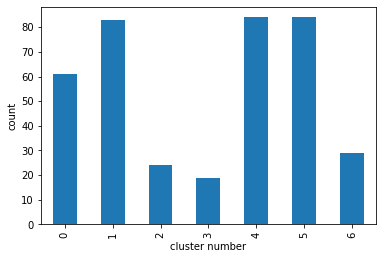

In [21]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=7, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='second_cluster_number', index=kanto_target.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [22]:
# 駅のデータにクラスター番号のデータを結合
kanto_target_with_cluster = pd.concat([kanto_target, pd.Series(labels, index=kanto_target.index)], axis=1)

# 先頭の5行を表示
kanto_target_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,cluster_number,pc1,pc2,station_name_roman,second_cluster_number
157,2100406,2100406,岩槻,NaN,NaN,21004,11,339-0057,さいたま市岩槻区本町,139.693197,...,20039.983182,1.030727,0.000000,291.0,122.133840,3,-0.078968,-1.368394,iwatsuki,1
180,2200124,2200124,元加治,NaN,NaN,22001,11,358-0054,入間市野田１６７,139.345316,...,21125.051061,1.069270,0.000000,324.0,147.943980,3,0.699091,-1.707650,motokaji,1
253,9930705,9930705,新井宿,NaN,NaN,99307,11,333-0826,川口市新井宿１５-３,139.737908,...,21881.610745,1.074773,0.000000,264.0,116.639141,3,-0.212346,-1.614904,araijuku,1
276,1130522,1130522,市川大野,NaN,NaN,11305,12,272-0805,市川市大野町３丁目,139.951227,...,15216.494154,1.056780,0.000000,202.0,89.306518,3,-2.333249,-1.673737,ichikawaoono,5
277,1130523,1130523,船橋法典,NaN,NaN,11305,12,273-0047,船橋市藤原１丁目,139.966771,...,18387.759589,1.075378,0.001399,283.0,115.462151,3,-0.396484,-1.733734,funabashihouten,1


In [23]:
import folium
center_lat, center_lon = (35.6812, 139.7671) # 東京の緯度経度
#center_lat, center_lon = (34.6413, 135.5629) # 大阪の緯度経度

_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, station in kanto_target_with_cluster.iterrows():
    color = 'red' if station['second_cluster_number'] == 0 else 'pink' if station['second_cluster_number'] == 1 else 'blue' if station['second_cluster_number'] == 2 else 'green' if station['second_cluster_number'] == 3 else 'orange' if station['second_cluster_number'] == 4 else 'purple' if station['second_cluster_number'] == 5 else 'darkblue' if station['second_cluster_number'] == 6 else 'gray' if station['second_cluster_number'] == 7 else 'black'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [24]:
kansai_target = kansai[kansai['cluster_number'] == 0]

In [25]:
# データの列の絞り込み
pc = kansai_target[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0    67
1    39
2     7
3    36
4    48
5    63
6    15
Name: second_cluster_number, dtype: int64


Text(0, 0.5, 'count')

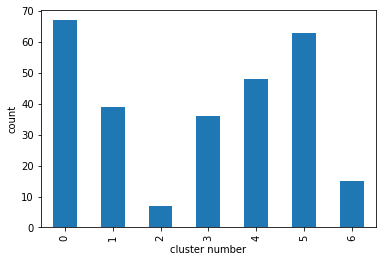

In [26]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=7, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='second_cluster_number', index=kansai_target.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [27]:
# 駅のデータにクラスター番号のデータを結合
kansai_target_with_cluster = pd.concat([kansai_target, pd.Series(labels, index=kansai_target.index)], axis=1)

# 先頭の5行を表示
kansai_target_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km,cluster_number,Unnamed: 0,pc1,pc2,second_cluster_number
62,1160209,1160209,千里丘,NaN,NaN,11602,27,566-0001,摂津市千里丘１丁目,135.551512,...,371.512361,295.512009,49303.126127,25293.654669,167.766736,0.0,62.0,-2.552083,3.603945,3
65,1160212,1160212,東淀川,NaN,NaN,11602,27,532-0003,大阪市淀川区宮原２丁目,135.503915,...,364.384902,339.730419,49733.896626,28862.880907,165.059675,0.0,65.0,-3.775312,2.827716,5
66,1160213,1160213,新大阪,NaN,NaN,11602,27,532-0011,大阪市淀川区西中島５丁目,135.501852,...,344.503608,328.335569,52486.022670,31302.037288,176.190173,0.0,66.0,-4.208493,2.604681,5
71,1160304,1160304,立花,NaN,NaN,11603,28,661-0025,尼崎市立花町１丁目,135.399571,...,405.762364,342.017219,47870.769878,31231.141396,217.387289,0.0,71.0,-3.477579,4.916214,3
76,1160308,1160308,甲南山手,NaN,NaN,11603,28,658-0001,神戸市東灘区森北町,135.292788,...,325.424900,286.272875,53735.689371,28968.009852,196.602106,0.0,76.0,-3.957298,2.323721,5


In [28]:
for _, station in kansai_target_with_cluster.iterrows():
    color = 'red' if station['second_cluster_number'] == 0 else 'pink' if station['second_cluster_number'] == 1 else 'blue' if station['second_cluster_number'] == 2 else 'green' if station['second_cluster_number'] == 3 else 'orange' if station['second_cluster_number'] == 4 else 'purple' if station['second_cluster_number'] == 5 else 'darkblue' if station['second_cluster_number'] == 6 else 'gray' if station['second_cluster_number'] == 7 else 'black'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [29]:
_map.save('commercial_stations_by_7.html') # 保存